# File for displaying calibrated spectograms

making use of the file ```zen.2459863.25263.sum.omni_vis.uvh5.tar.gz  ```

## PLotting an autocorrelation
using ```zen.2459863.25778.sum.autos.uvh5```


/home/skib/Repos/RFI-Detection/.venv/lib64/python3.13/site-packages/astropy/config/paths.py:55: AstropyUserWarning: XDG_CONFIG_HOME is set to '/home/skib/.config', but the default location, /home/skib/.astropy/config, already exists, and takes precedence. This environment variable will be ignored.
  return set_temp_config._get_dir_path(rootname)


(360, 1536, 2)


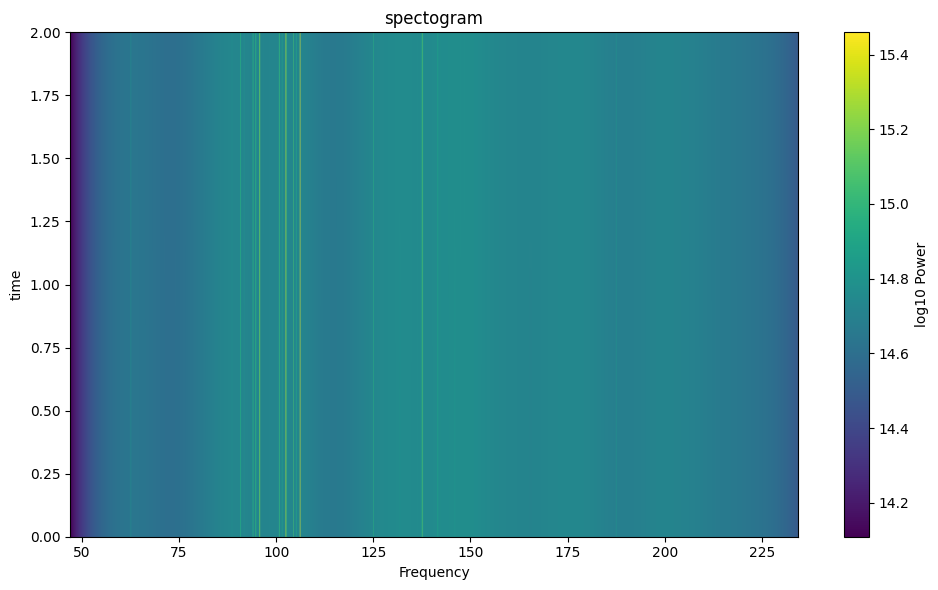

In [1]:
from pyuvdata import UVData
import numpy as np
import matplotlib.pyplot as plt

uvd = UVData()
uvd.read('/home/skib/Repos/RFI-Detection/src/zen.2459863.25778.sum.autos.uvh5')
#uvd.read('/home/skib/Repos/RFI-Detection/src/zen.2460797.50227.diff.autos.uvh5')
data = np.squeeze(uvd.data_array)
print(data.shape)
if data.ndim == 3:
    data = data[:, :, 0]
elif data.ndim != 2:
    raise ValueError(f"Unexpected data shape: {data.shape}")


power = np.abs(data) ** 2

freqs = uvd.freq_array
if freqs.ndim > 1:
    freqs = freqs[0]
freqs = freqs / 1e6

times = uvd.time_array
unique_times, time_idx = np.unique(times, return_inverse=True)

power_avg = np.zeros((len(unique_times), power.shape[1]))
for i in range(len(unique_times)):
    power_avg[i] = power[time_idx == i].mean(axis=0)

plt.figure(figsize=(10, 6))
plt.imshow(
    np.log10(power_avg),
    aspect='auto',
    origin='lower',
    extent=[freqs[0], freqs[-1], 0, len(unique_times)]
)
plt.colorbar(label='log10 Power')
plt.xlabel('Frequency')
plt.ylabel('time')
plt.title('spectogram')
plt.tight_layout()
plt.show()
